In [1]:
import numpy as np 
import pandas as pd 
import os
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import combinations
from sklearn.model_selection import train_test_split
from catboost import Pool, CatBoostClassifier
from sklearn.metrics import log_loss, roc_auc_score
from sklearn.metrics import confusion_matrix, classification_report,ConfusionMatrixDisplay
from sklearn.utils.class_weight import compute_class_weight
import shap
shap.initjs()

Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)


In [2]:
df = pd.read_csv('D:\PyCharmProject\Diabetes_Dataset\healthcarediabetes.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
df.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [7]:
#check duplicates 
df.duplicated().sum()

0

In [8]:
#Copy of original df to perform analysis on
df1=df.copy()

In [9]:
df1=df1.sort_values(by=['Age'])

In [10]:
df1_none=df1.copy()

In [11]:
#replace 0 value in compromised columns to None
def replace_none(df):
    df_none=df.copy()
    for col in ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']:
        df_none[col] = df_none[col].replace(0,None)
    return df_none

In [12]:
df1_none=replace_none(df1)

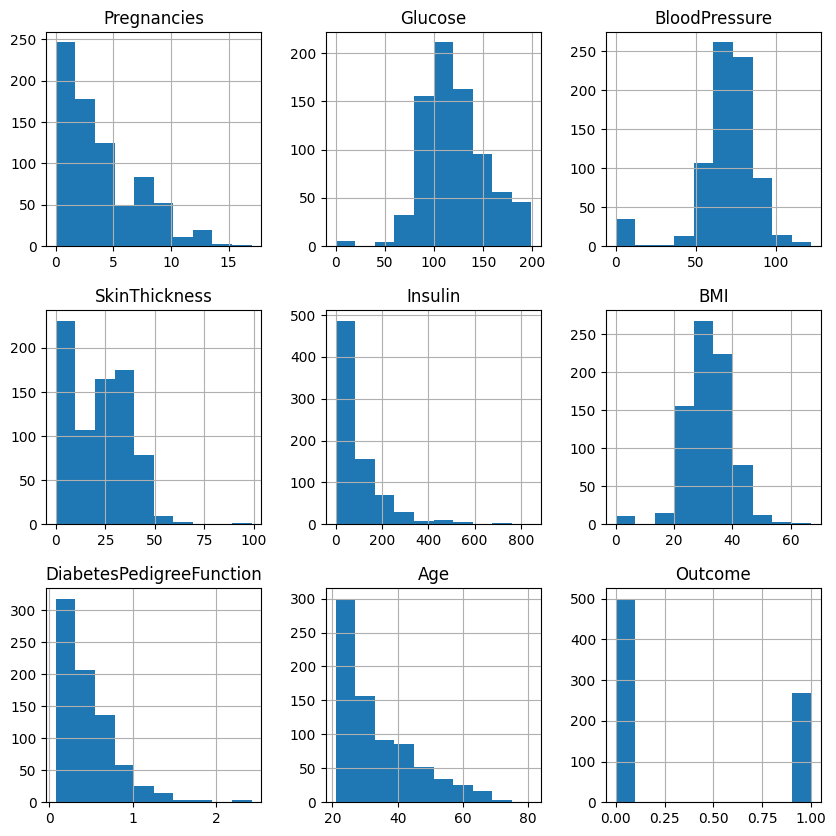

In [13]:
df1.hist(figsize=(10,10))
plt.show()

In [14]:
df_age=df1['Age']
l_age=df_age.values
df_no_age=df1.drop(['Age'],axis=1)

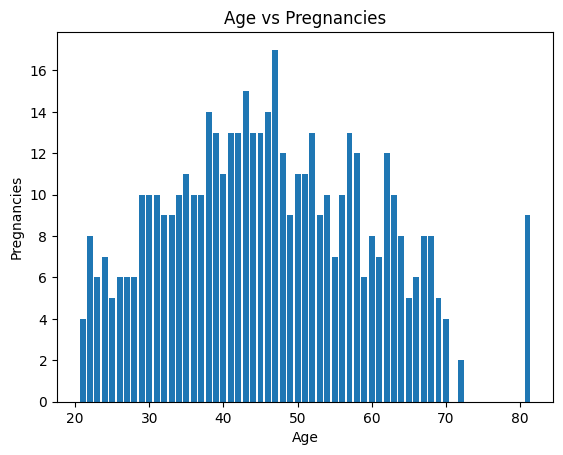

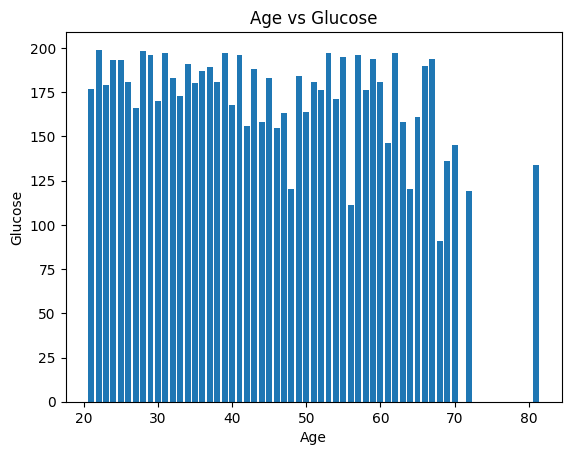

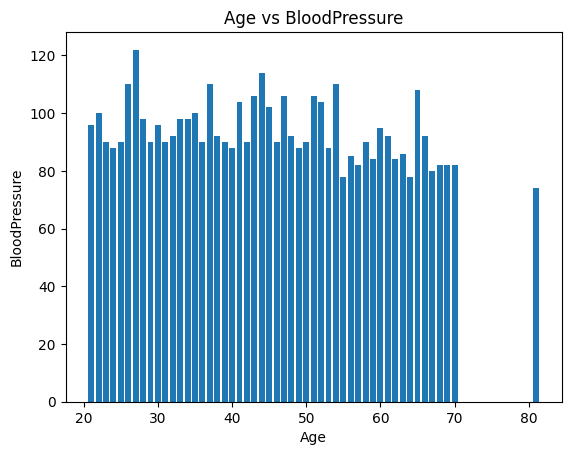

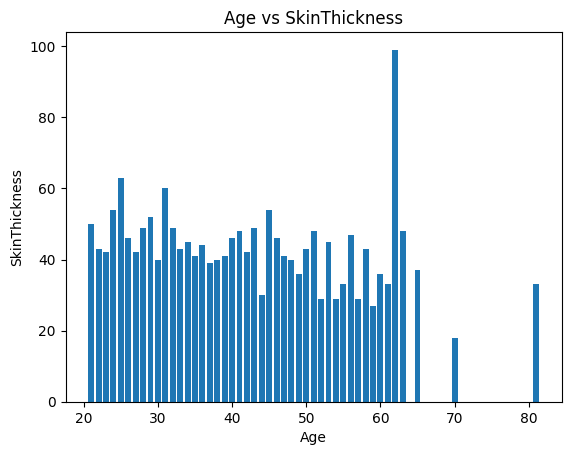

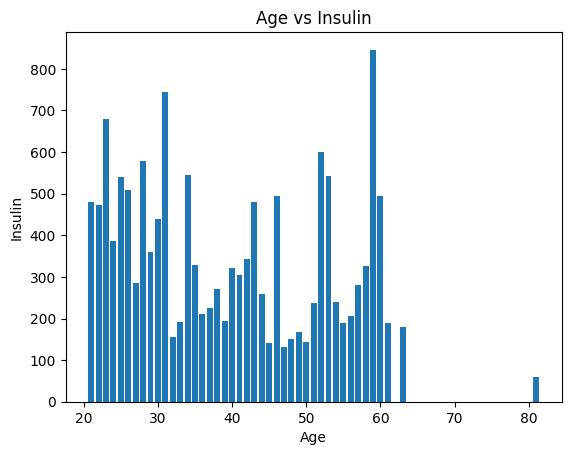

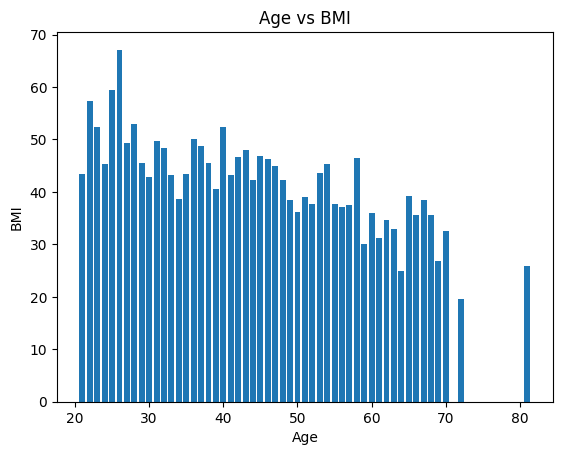

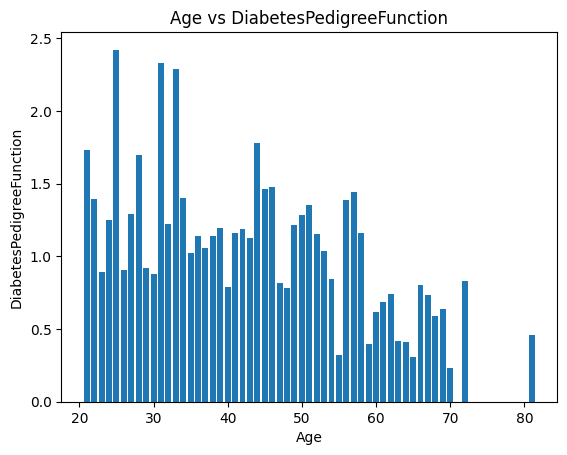

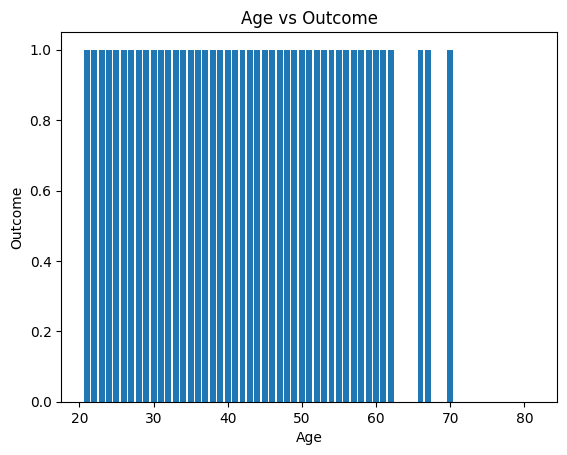

In [15]:
for col in df_no_age:
    plt.figure()
    plt.bar(l_age, df_no_age[col])
    plt.xlabel('Age')
    plt.ylabel(col)
    plt.title(f"Age vs {col}")
    plt.show()

In [16]:
#There doesnt seem to be any correlation between age and the other features except for pregnancies

In [17]:
l_outcome=df1_none['Outcome'].values
df_no_outcome=df1_none.drop(['Outcome'],axis=1)
colors = np.where(df1_none['Outcome']==1,'y','k')

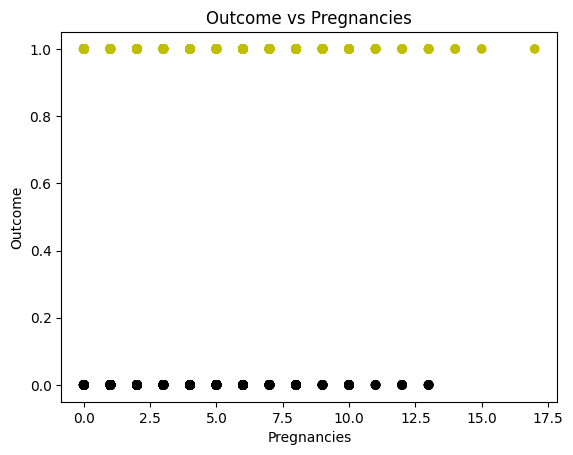

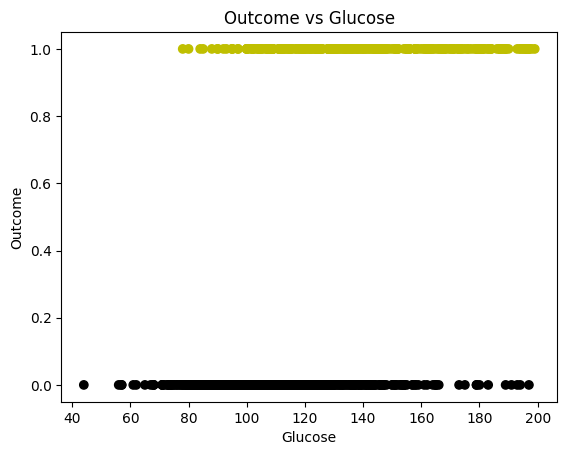

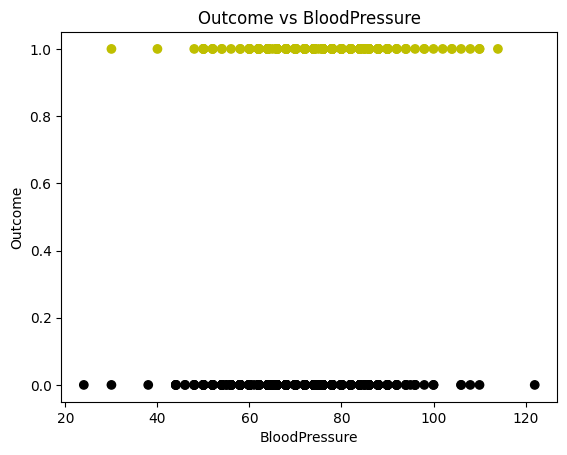

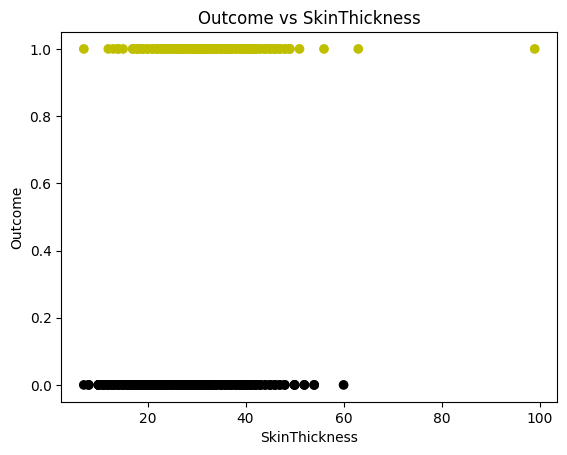

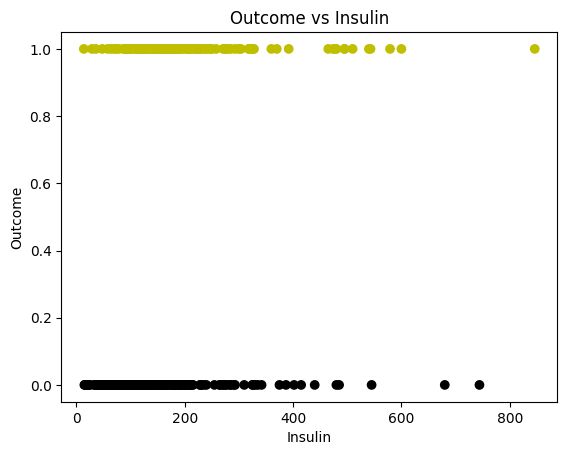

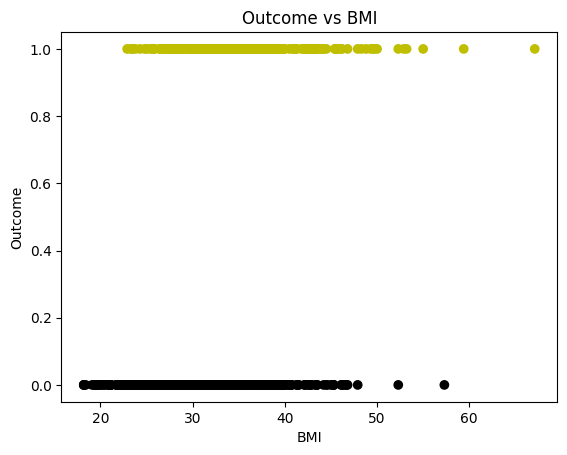

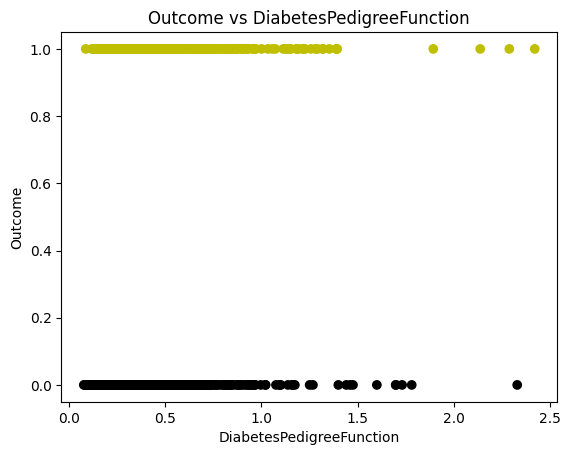

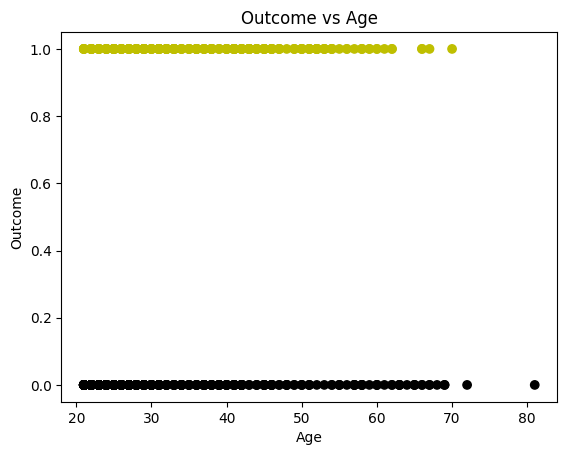

In [18]:
for col in df_no_outcome:
    plt.figure()
    plt.scatter(df_no_outcome[col],l_outcome,c=colors)
    plt.xlabel(col)
    plt.ylabel('Outcome')
    plt.title(f"Outcome vs {col}")
    plt.show()


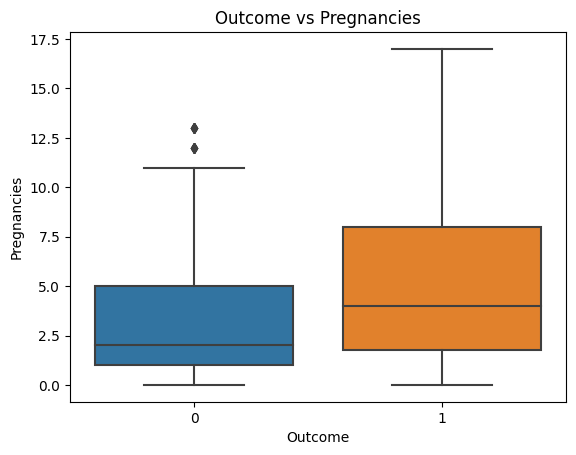

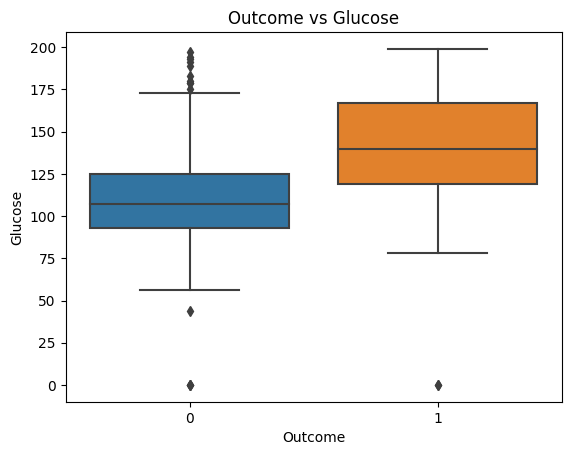

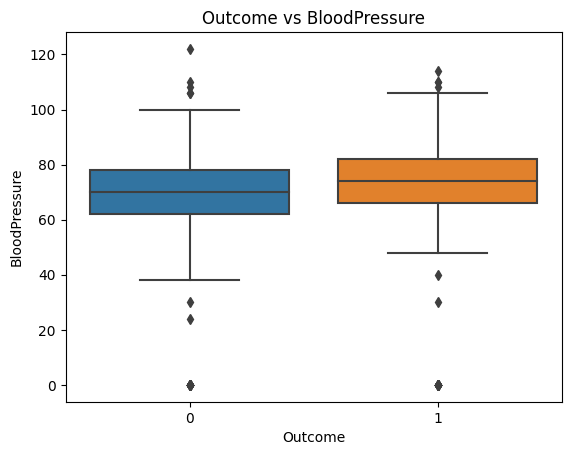

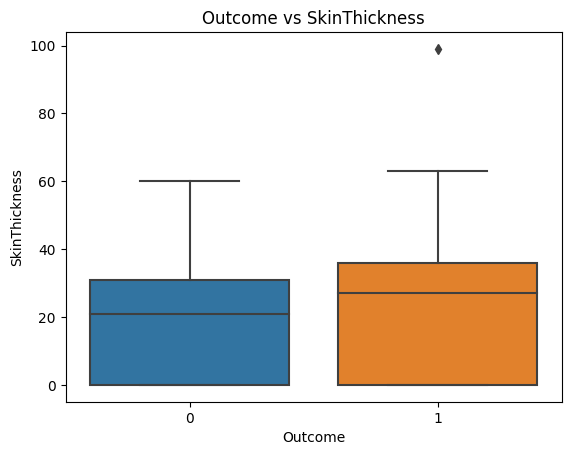

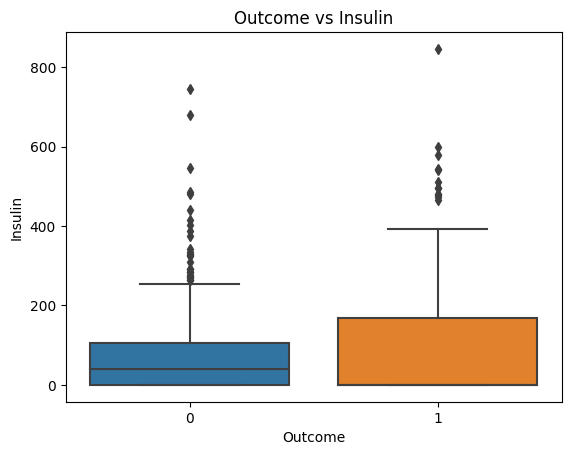

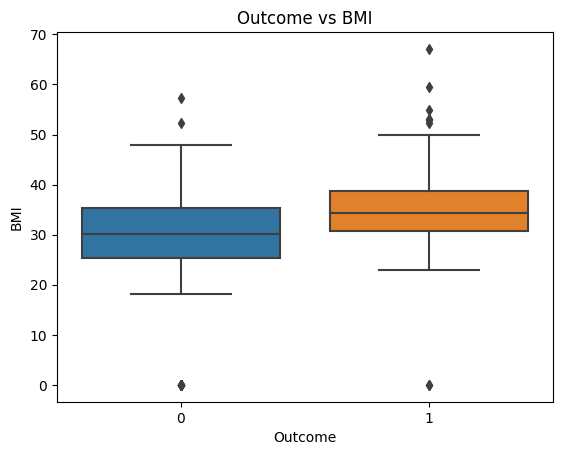

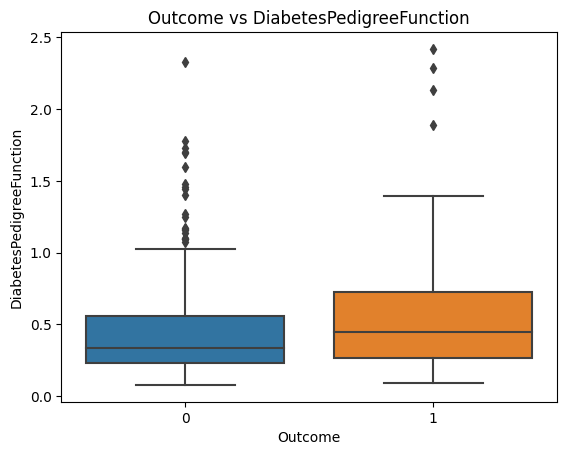

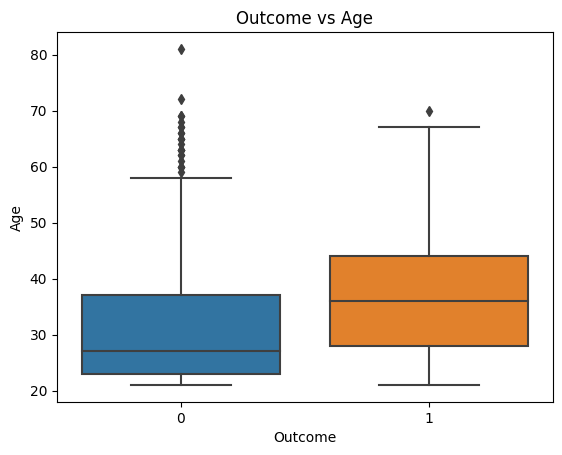

In [19]:
for col in df_no_outcome:
    sns.boxplot(x='Outcome', y=col, data=df1)
    plt.xlabel('Outcome')
    plt.ylabel(col)
    plt.title(f"Outcome vs {col}")
    plt.show()

In [20]:
feature_combinations = list(combinations(df_no_outcome.columns,2))

Pregnancies vs Glucose Outcome


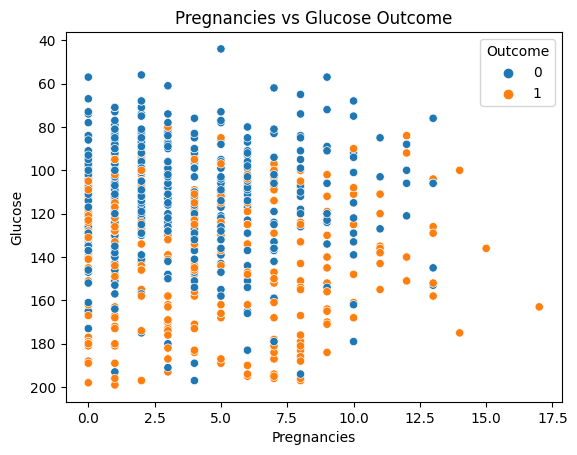

Pregnancies vs BloodPressure Outcome


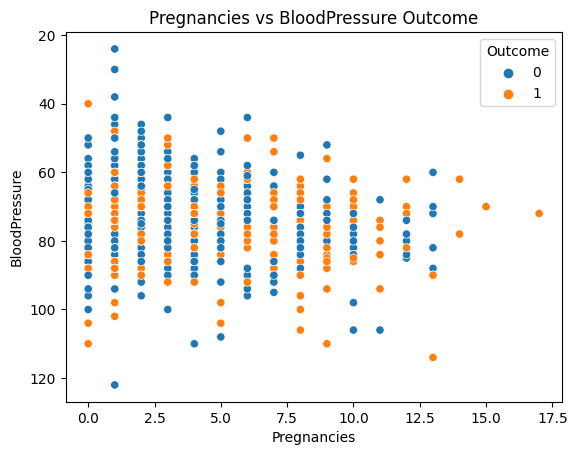

Pregnancies vs SkinThickness Outcome


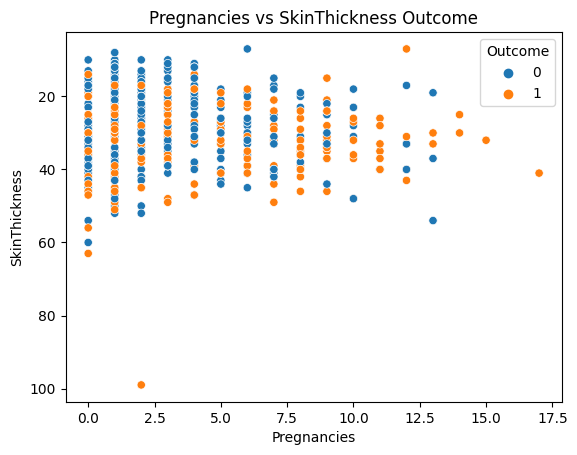

Pregnancies vs Insulin Outcome


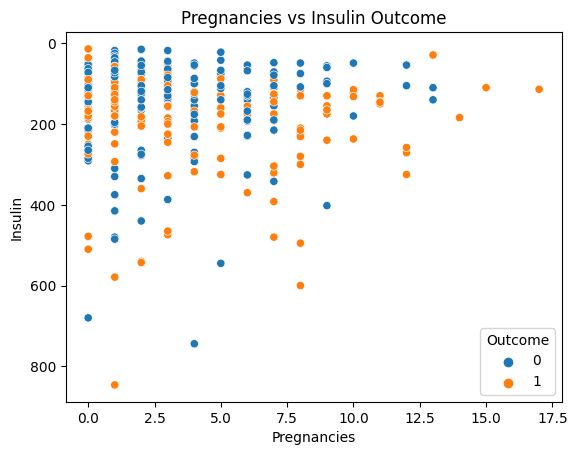

Pregnancies vs BMI Outcome


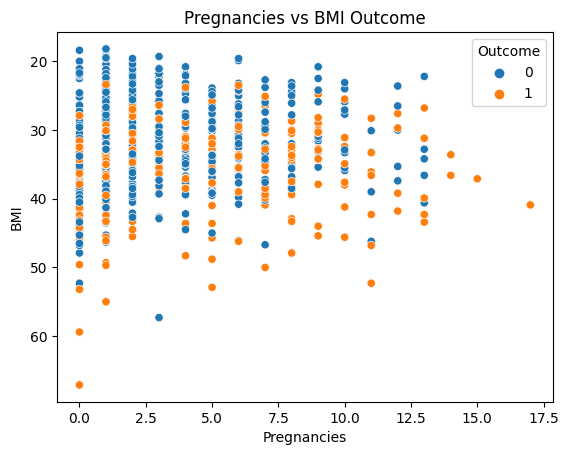

Pregnancies vs DiabetesPedigreeFunction Outcome


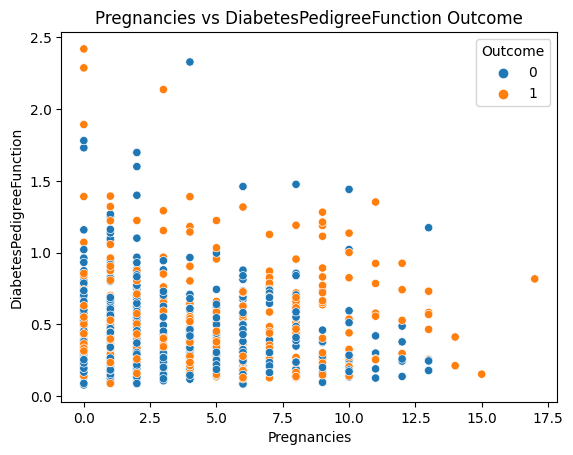

Pregnancies vs Age Outcome


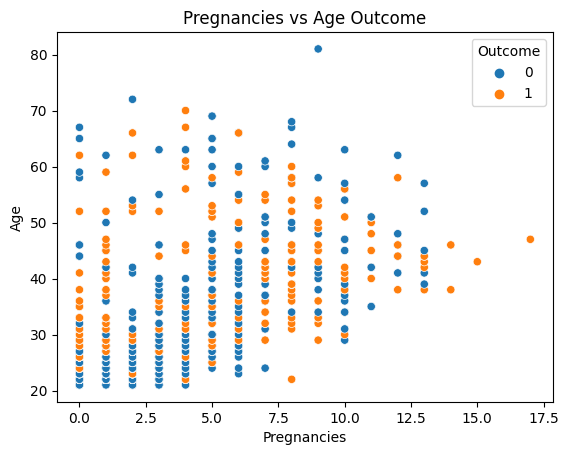

Glucose vs BloodPressure Outcome


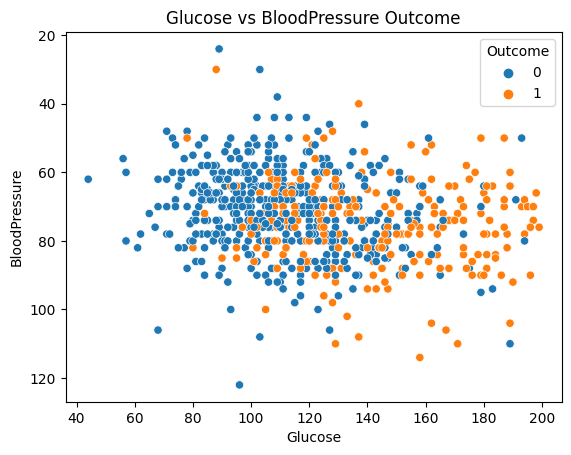

Glucose vs SkinThickness Outcome


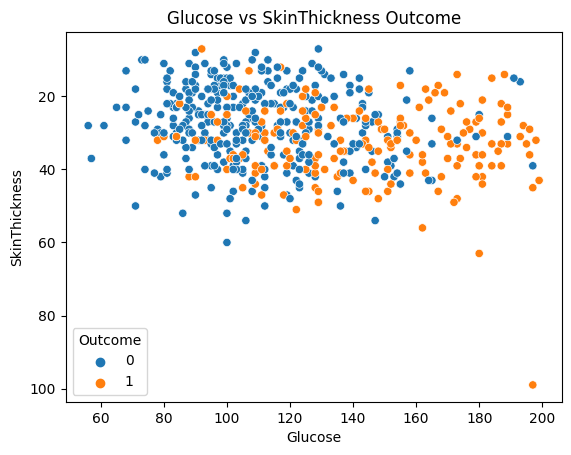

Glucose vs Insulin Outcome


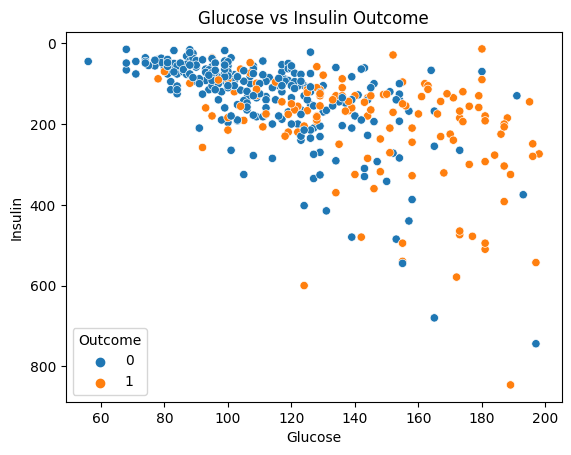

Glucose vs BMI Outcome


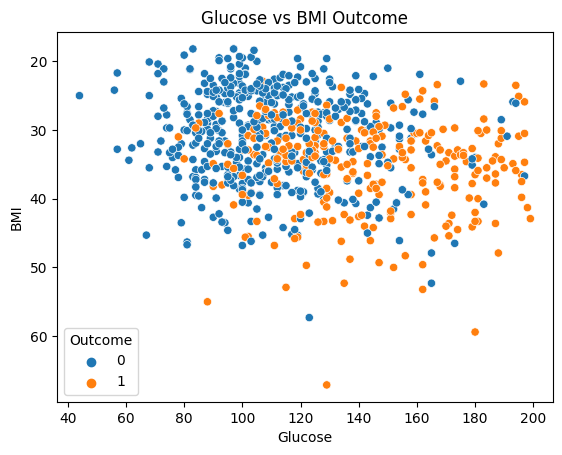

Glucose vs DiabetesPedigreeFunction Outcome


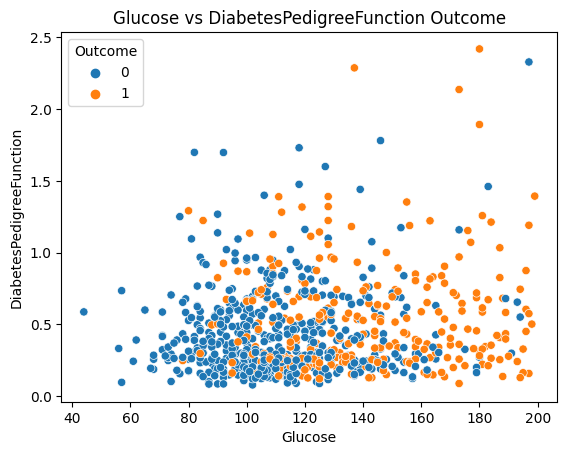

Glucose vs Age Outcome


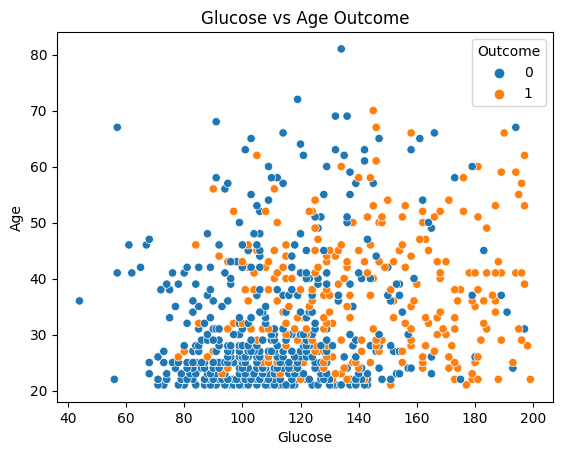

BloodPressure vs SkinThickness Outcome


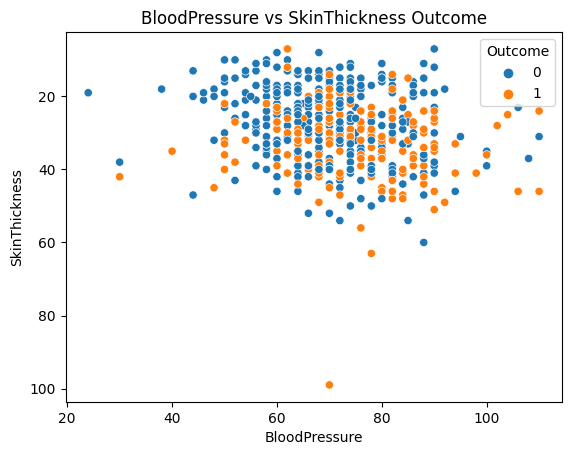

BloodPressure vs Insulin Outcome


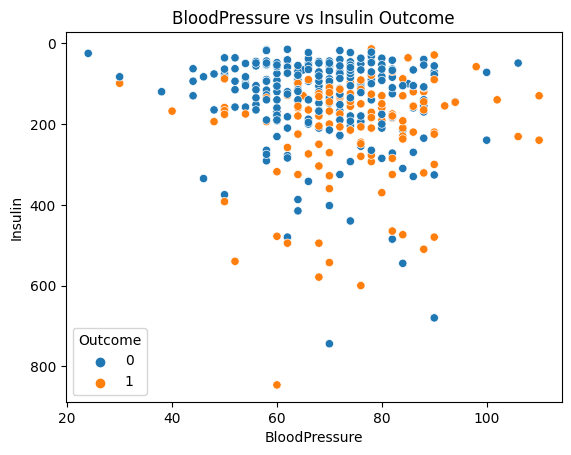

BloodPressure vs BMI Outcome


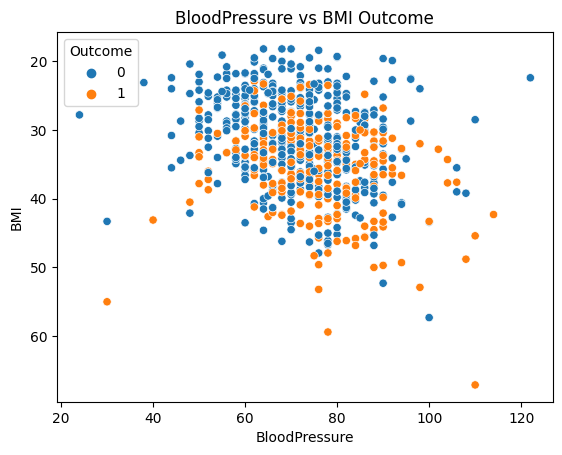

BloodPressure vs DiabetesPedigreeFunction Outcome


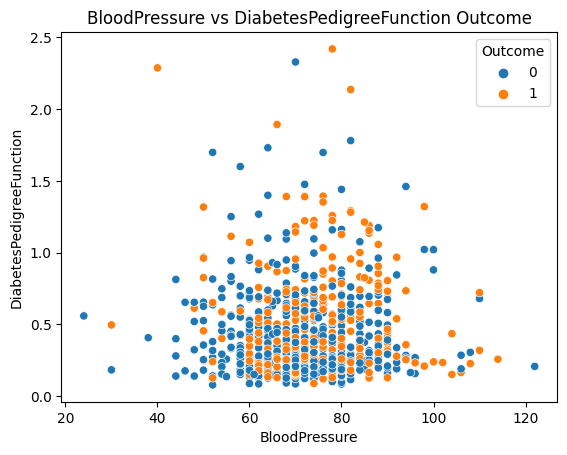

BloodPressure vs Age Outcome


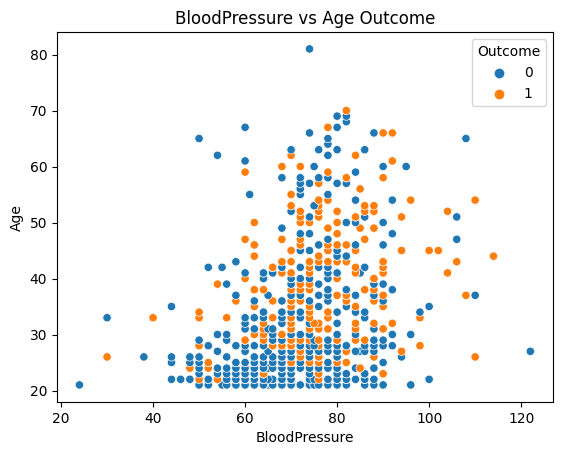

SkinThickness vs Insulin Outcome


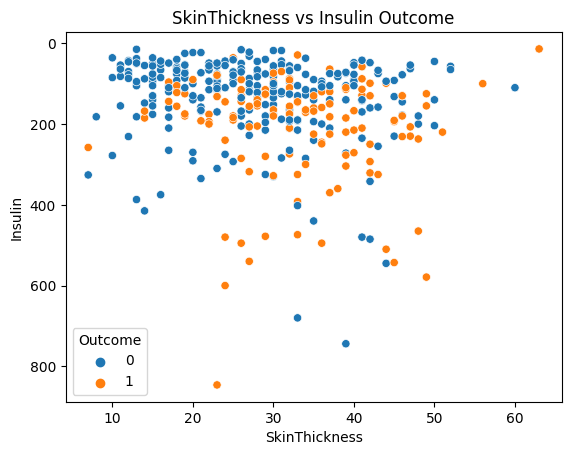

SkinThickness vs BMI Outcome


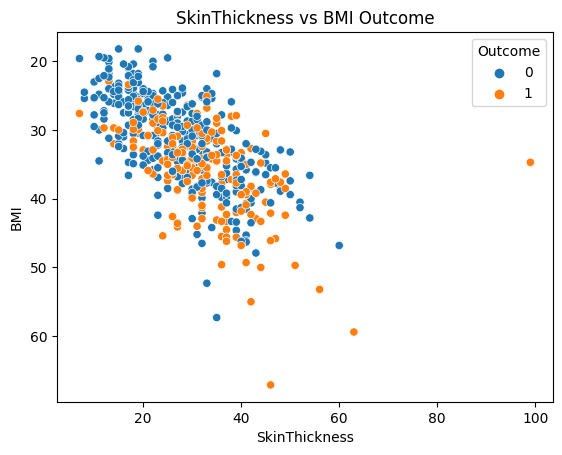

SkinThickness vs DiabetesPedigreeFunction Outcome


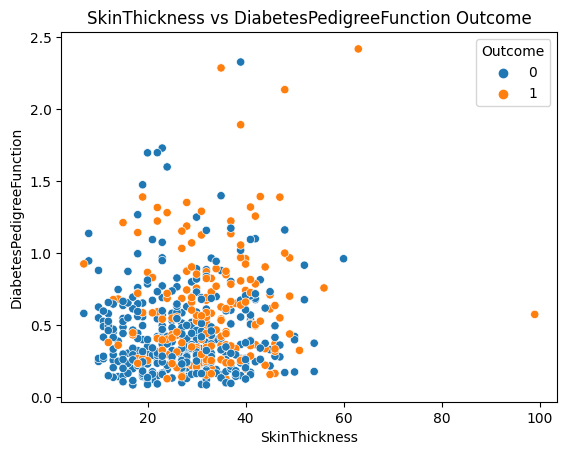

SkinThickness vs Age Outcome


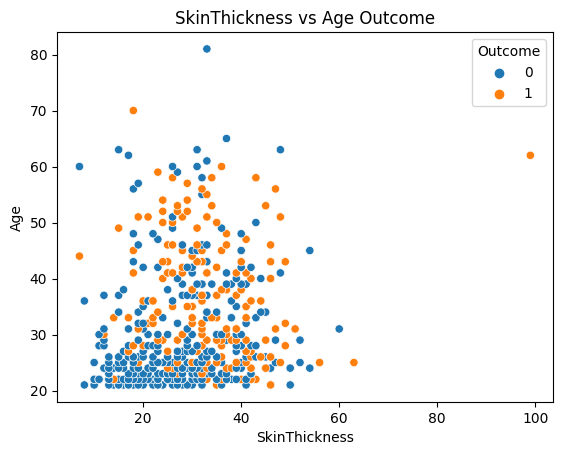

Insulin vs BMI Outcome


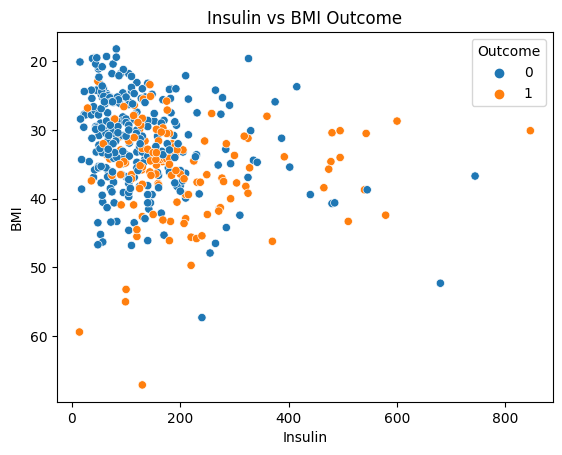

Insulin vs DiabetesPedigreeFunction Outcome


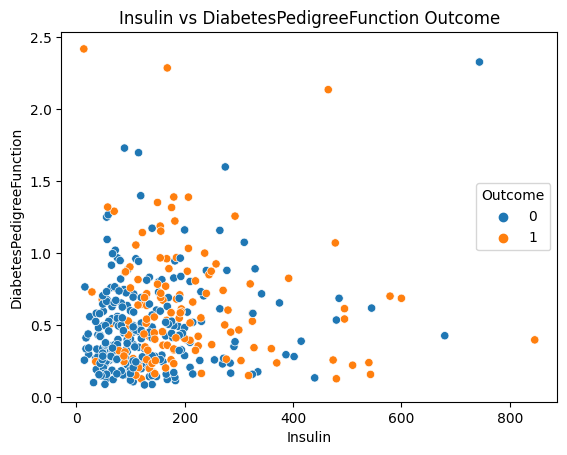

Insulin vs Age Outcome


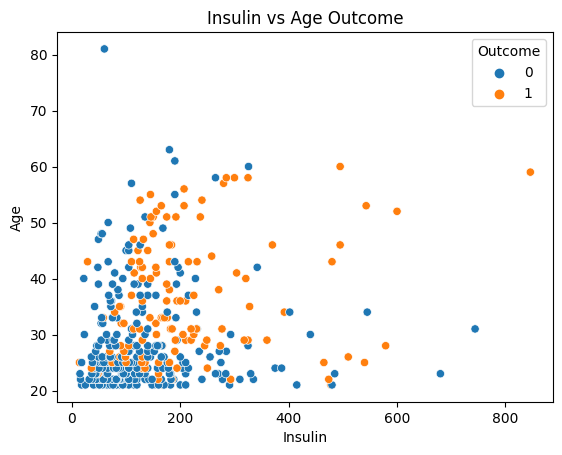

BMI vs DiabetesPedigreeFunction Outcome


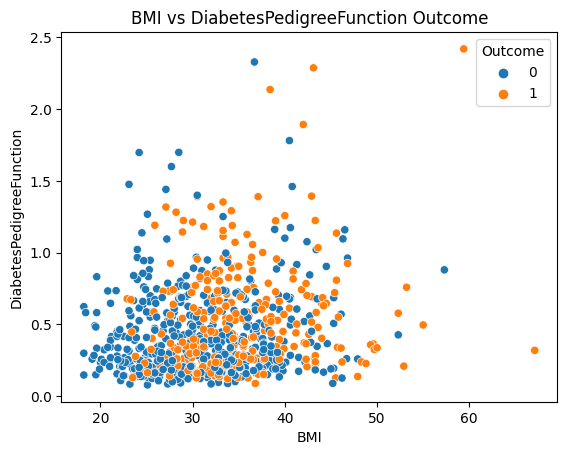

BMI vs Age Outcome


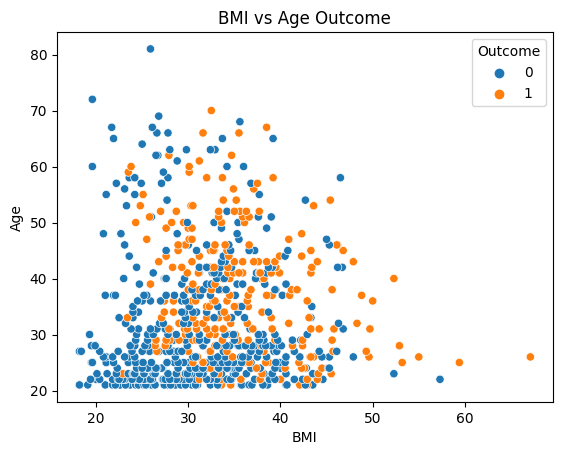

DiabetesPedigreeFunction vs Age Outcome


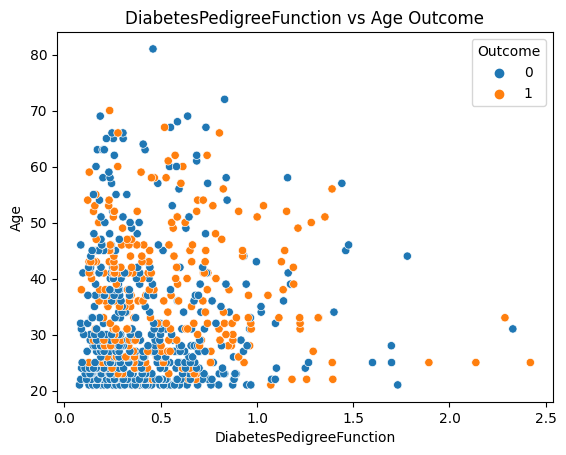

In [21]:
#Seeing all combinations of two features effects on outcome
for combo in feature_combinations:
    sns.scatterplot(x=combo[0],y=combo[1],hue='Outcome',data=df1_none)
    plt.xlabel(combo[0])
    plt.ylabel(combo[1])
    plt.title(f"{combo[0]} vs {combo[1]} Outcome")
    print(f"{combo[0]} vs {combo[1]} Outcome")
    plt.show()

In [22]:
X= df_no_outcome
y= df1_none[['Outcome']].values.reshape(-1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [23]:
model=CatBoostClassifier(iterations=300, learning_rate=0.01, task_type="GPU", devices='0:1',verbose=10)

In [24]:
model.fit(X_train, y_train,
         eval_set=(X_test, y_test),
         verbose=100)

0:	learn: 0.6858756	test: 0.6874404	best: 0.6874404 (0)	total: 7.06ms	remaining: 2.11s
100:	learn: 0.4104962	test: 0.5124705	best: 0.5124705 (100)	total: 585ms	remaining: 1.15s
200:	learn: 0.3343755	test: 0.4890207	best: 0.4890207 (200)	total: 1.15s	remaining: 567ms
299:	learn: 0.2915132	test: 0.4831161	best: 0.4831161 (299)	total: 1.73s	remaining: 0us
bestTest = 0.4831160704
bestIteration = 299


In [25]:
y_pred=model.predict(X_test)

In [26]:
print('Classification Report:',classification_report(y_test, y_pred))
print('Log Loss:',log_loss(y_test, y_pred))
print('ROC AUC:',roc_auc_score(y_test, y_pred))

Classification Report:               precision    recall  f1-score   support

           0       0.77      0.91      0.83       122
           1       0.77      0.51      0.62        70

    accuracy                           0.77       192
   macro avg       0.77      0.71      0.72       192
weighted avg       0.77      0.77      0.75       192

Log Loss: 8.447731263074333
ROC AUC: 0.7120608899297424


In [27]:
def display_conf_matrix(y_true, y_preds):
    cm = confusion_matrix(y_true, y_preds)
    cmd = ConfusionMatrixDisplay(cm, display_labels=['No','Yes'])
    cmd.plot()

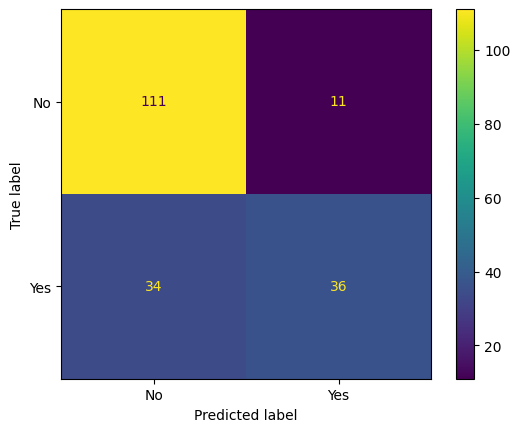

In [28]:
display_conf_matrix(y_test,y_pred) 

In [29]:
df2=df1.copy()

In [31]:
def custom_round(x, base):
    return int(base * round(float(x)/base))

In [32]:
for col in ['Age','Glucose','Insulin']:
    df2[col]=df2[col].apply(lambda x: custom_round(x, base=5))

In [33]:
df2_none=replace_none(df2)

In [34]:
X_2= df2_none.drop(['Outcome'],axis=1)
y_2= df2_none[['Outcome']].values.reshape(-1)
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, random_state=1)

In [35]:
model2=CatBoostClassifier(iterations=300, learning_rate=0.01, task_type="GPU", devices='0:1',verbose=10)

In [36]:
model2.fit(X_train_2, y_train_2,
         eval_set=(X_test_2, y_test_2),
         verbose=100)

0:	learn: 0.6866688	test: 0.6876403	best: 0.6876403 (0)	total: 6.5ms	remaining: 1.94s
100:	learn: 0.4143789	test: 0.5127126	best: 0.5127126 (100)	total: 557ms	remaining: 1.1s
200:	learn: 0.3379897	test: 0.4909633	best: 0.4909633 (200)	total: 1.09s	remaining: 539ms
299:	learn: 0.2983095	test: 0.4853719	best: 0.4853719 (299)	total: 1.63s	remaining: 0us
bestTest = 0.4853719076
bestIteration = 299


In [37]:
y_pred_2=model2.predict(X_test_2)

In [38]:
print('Classification Report:',classification_report(y_test_2, y_pred_2))
print('Log Loss:',log_loss(y_test_2, y_pred_2))
print('ROC AUC:',roc_auc_score(y_test_2, y_pred_2))

Classification Report:               precision    recall  f1-score   support

           0       0.77      0.91      0.83       122
           1       0.77      0.53      0.63        70

    accuracy                           0.77       192
   macro avg       0.77      0.72      0.73       192
weighted avg       0.77      0.77      0.76       192

Log Loss: 8.26000390167268
ROC AUC: 0.7192037470725995


In [39]:
def zscore_normalize_features(X):
    mu = np.mean(X, axis=0)
    sigma = np.std(X, axis=0)                  
    X_norm = (X - mu) / sigma      

    return (X_norm)

In [40]:
df3=df1.copy()
#Round these columns to nearest power of 5
for col in ['Age','Glucose','Insulin']:
    df3[col]=df3[col].apply(lambda x: custom_round(x, base=5))

df3_none=replace_none(df3)

In [41]:
for col in ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']:
    df3_none[f"Z_{col}"]=zscore_normalize_features(df3_none[col])

In [42]:
df3_none.head()
df3_none['Age']=df3_none['Age'].apply(lambda x: custom_round(x, base=5))

In [43]:
df3_none=df3_none.drop(['DiabetesPedigreeFunction'],axis=1)

In [44]:
#Create training sets but keep a copy of sets before normalization
X_3= df3_none.drop(['Outcome'],axis=1)
y_3= df3_none[['Outcome']].values.reshape(-1)
X_train_3_orig, X_test_3_orig, y_train_3, y_test_3 = train_test_split(X_3, y_3, random_state=1)
X_train_3, X_test_3 = X_train_3_orig.copy(), X_test_3_orig.copy()

for col in ['Glucose','BloodPressure','SkinThickness','Insulin','BMI']:
    X_train_3=X_train_3.drop([col], axis=1)
    X_test_3=X_test_3.drop([col], axis=1)
    X_train_3_orig=X_train_3_orig.drop([f"Z_{col}"], axis=1)
    X_test_3_orig=X_test_3_orig.drop([f"Z_{col}"], axis=1)

In [45]:
classes = np.unique(y_train_3)
weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_train_3)
class_weights = dict(zip(classes, weights))

In [46]:
#Weights had significant improvement on ROC AUC score
model3=CatBoostClassifier(iterations=300, 
                          learning_rate=0.01, 
                          l2_leaf_reg=0.03, 
                          class_weights=class_weights, 
                          task_type="GPU", 
                          devices='0:1',
                          verbose=10)

In [47]:
model3.fit(X_train_3, y_train_3,
         eval_set=(X_test_3, y_test_3),
         verbose=100)

0:	learn: 0.6870037	test: 0.6883175	best: 0.6883175 (0)	total: 6.08ms	remaining: 1.82s
100:	learn: 0.3705562	test: 0.5243586	best: 0.5237779 (99)	total: 547ms	remaining: 1.08s
200:	learn: 0.2745790	test: 0.5318071	best: 0.5212625 (130)	total: 1.09s	remaining: 535ms
299:	learn: 0.2179428	test: 0.5502276	best: 0.5212625 (130)	total: 1.63s	remaining: 0us
bestTest = 0.5212625125
bestIteration = 130
Shrink model to first 131 iterations.


In [48]:
y_pred_3=model3.predict(X_test_3)

In [49]:
print('Classification Report:',classification_report(y_test_3, y_pred_3))
print('Log Loss:',log_loss(y_test_3, y_pred_3))
print('ROC AUC:',roc_auc_score(y_test_3, y_pred_3))

Classification Report:               precision    recall  f1-score   support

           0       0.84      0.80      0.82       122
           1       0.68      0.74      0.71        70

    accuracy                           0.78       192
   macro avg       0.76      0.77      0.76       192
weighted avg       0.78      0.78      0.78       192

Log Loss: 8.072276540271028
ROC AUC: 0.7689695550351288


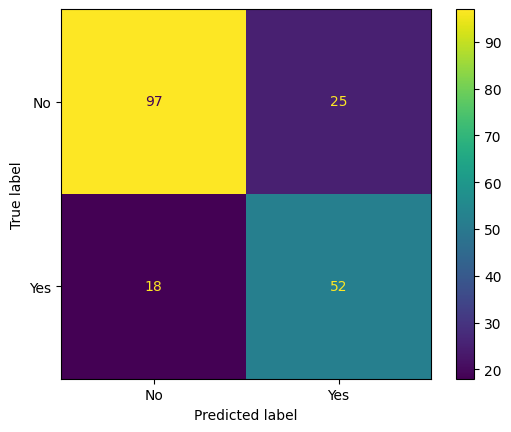

In [50]:
display_conf_matrix(y_test_3,y_pred_3) 

In [51]:
explainer = shap.Explainer(model3)

In [52]:
shap_values=explainer(X_train_3)

In [53]:
np.shape(shap_values.values)

(576, 7)

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


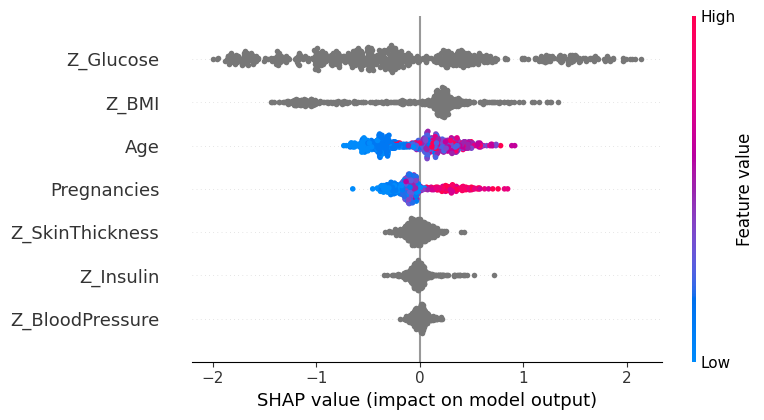

In [54]:
shap.summary_plot(shap_values, X_train_3)

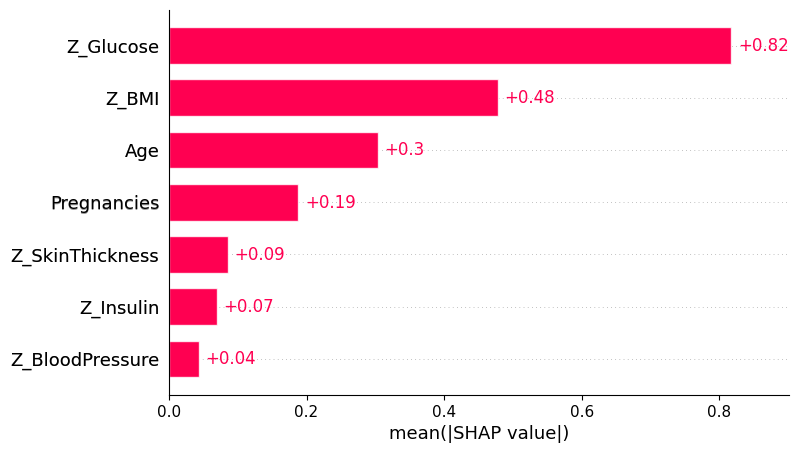

In [55]:
#Glucose has the highest effect on outcome, blood pressure has the lowest
shap.plots.bar(shap_values)

In [56]:
random=np.random.choice(576)
print(f"Viewing choice {random}")
print(f"pred: {model3.predict(X_train_3.iloc[random])} actual: {y_train_3[random]}")
print(X_train_3_orig.iloc[random])
print(X_train_3.iloc[random])
shap.plots.force(shap_values[random])

Viewing choice 309
pred: 0 actual: 0
Pregnancies         4
Glucose            90
BloodPressure    None
SkinThickness    None
Insulin          None
BMI              28.0
Age                30
Name: 643, dtype: object
Pregnancies               4
Age                      30
Z_Glucose         -1.035824
Z_BloodPressure         NaN
Z_SkinThickness         NaN
Z_Insulin               NaN
Z_BMI             -0.644104
Name: 643, dtype: object


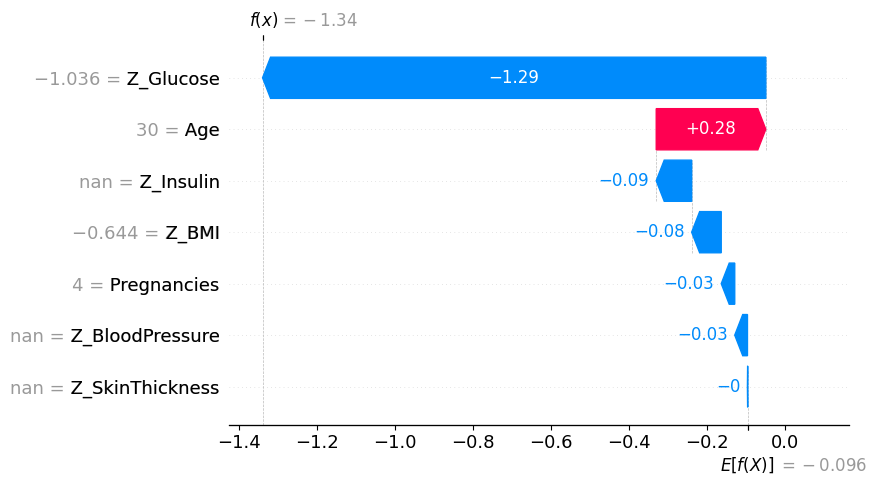

In [57]:
shap.plots.waterfall(shap_values[random])